In [99]:
import pandas as pd

df = pd.read_csv('S02-hw-dataset.csv')
df.head()


,user_id,age,country,purchases,revenue
0,1,25.0,FR,7,749
1,2,24.0,RU,5,1115
2,3,52.0,FR,7,399
3,4,31.0,RU,6,654
4,5,NaN,DE,6,1296


In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB


In [103]:
df.describe()

,user_id,age,purchases,revenue
count,41.000000,39.000000,41.000000,41.000000
mean,20.243902,36.512821,4.829268,820.048780
std,11.659289,18.304259,2.710189,613.127269
min,1.000000,5.000000,-1.000000,0.000000
25%,10.000000,24.000000,3.000000,432.000000
50%,20.000000,33.000000,5.000000,693.000000
75%,30.000000,45.500000,7.000000,1115.000000
max,40.000000,120.000000,11.000000,2475.000000


In [105]:
sum(df.duplicated())

1

In [107]:
print(df['user_id'].isna().mean())
print(df['age'].isna().mean())
print(df['purchases'].isna().mean())
print(df['revenue'].isna().mean())

0.0
0.04878048780487805
0.0
0.0


In [109]:
print('Отрицательный возраст:', sum(df['age'] < 0))
print('Нереальный возраст:', sum(df['age'] > 100))
print('Отрицательные покупки:', sum(df['purchases'] < 0))
print('Отрицательные покупки и отрицательный доход:', sum((df['purchases'] < 0) & (df['revenue'] <= 0)))
print('Не определена страна:', sum(df['country'].isna()))
print('Нулевой доход с ненулевыми покупками:', sum((df['revenue'] == 0) & (df['purchases'] != 0)))
print('Отрицательный доход:', sum(df['revenue'] < 0))

Отрицательный возраст: 0
Нереальный возраст: 1
Отрицательные покупки: 1
Отрицательные покупки и отрицательный доход: 0
Не определена страна: 0
Нулевой доход с ненулевыми покупками: 1
Отрицательный доход: 0


Проанализировав данный датасет, можно сказать, что в нем имеются некорректные данные. Например, в одной строке указан нереальный возраст (больше 100). Одна строка содержит отрицательные покупки, но в это же время доход положительный, значит подобного быть не может. Одна строка содержит нулевой доход с ненулевыми покупками. Нигде не указана возможность возврата товаров, значит это некорректное значение.

In [112]:
df['country'].value_counts()

country
RU    13
FR    12
US     8
DE     6
CN     2
Name: count, dtype: int64

In [114]:
df.groupby(['age'])['user_id'].count() # количество покупателей определенного возраста

age
5.0      1
18.0     1
20.0     1
21.0     1
22.0     1
23.0     1
24.0     5
25.0     1
26.0     1
28.0     2
31.0     2
32.0     2
33.0     1
34.0     1
35.0     2
36.0     1
39.0     2
42.0     1
43.0     1
45.0     1
46.0     1
47.0     2
51.0     1
52.0     2
54.0     1
55.0     1
57.0     1
120.0    1
Name: user_id, dtype: int64

In [116]:
df.groupby(['user_id'])['revenue'].mean() # сколько в среднем тратит каждый покупатель

user_id
1      749.0
2     1115.0
3      399.0
4      654.0
5     1296.0
6      785.0
7        0.0
8      456.0
9      980.0
10     511.0
11       0.0
12    1652.0
13     630.0
14    2358.0
15     693.0
16     183.0
17    1608.0
18       0.0
19     432.0
20     442.0
21    1488.0
22     546.0
23     904.0
24    2475.0
25     650.0
26     330.0
27    1302.0
28     828.0
29    1440.0
30     702.0
31     142.0
32    1080.0
33     445.0
34       0.0
35     404.0
36     342.0
37    1104.0
38     738.0
39    1162.0
40    2086.0
Name: revenue, dtype: float64

In [189]:
mode = df['age'].mode()[0]
df['age'] = df['age'].fillna(mode)


age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 100, 110, 120]
age_labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-100', '100-110', '110-120']

df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels)
df.groupby(['age_group'], observed=True)['revenue'].sum() # доход со всех покупок по возрастам
# df

age_group
0-10        1488
10-20       2756
20-30       7626
30-40      13379
40-50       4008
50-60       3580
110-120      785
Name: revenue, dtype: int64

In [191]:
df.groupby(['age_group'], observed=True)['user_id'].count() # количество покупателей по возрастам

age_group
0-10        1
10-20       2
20-30      14
30-40      11
40-50       6
50-60       6
110-120     1
Name: user_id, dtype: int64

In [193]:
df.groupby(['age_group'], observed=True)['purchases'].mean() # средняя сумма покупки по возрастам

age_group
0-10       8.000000
10-20      5.500000
20-30      4.714286
30-40      6.000000
40-50      3.000000
50-60      5.000000
110-120   -1.000000
Name: purchases, dtype: float64

In [195]:
purchases_age = df.groupby(['age_group'], observed=True)['purchases'].sum() # сумма всех покупок по возрастам
purchases_age

age_group
0-10        8
10-20      11
20-30      66
30-40      66
40-50      18
50-60      30
110-120    -1
Name: purchases, dtype: int64

Наибольший доход получен с покупок людей в возрасте 30-40 лет. Покупателей в возрасте 20-30 лет было наибольшее количество. Наибольшая средняя сумма покупки была в категории 0-10 лет. Больше всего покупок совершили покупатели в возрасте 20-30 и 30-40 лет. Сумма всех покупок в возрастной категории 100-200 составила -1, что является некорректной инфоомацией, так как покупки должны быть >= 0.

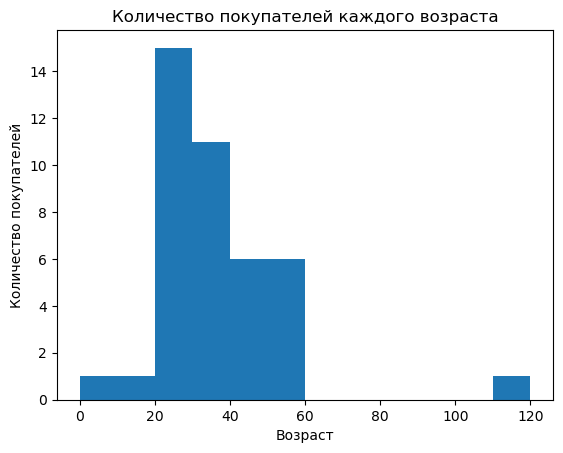

In [221]:
import matplotlib.pyplot as plt

plt.hist(df['age'], bins=age_bins)
plt.title('Количество покупателей каждого возраста')
plt.xlabel('Возраст')
plt.ylabel('Количество покупателей')
plt.savefig('figures/age_users.png', dpi=300, bbox_inches='tight')

Первый график показывает количесто покупателей определенного возраста. Из него следует, что преобладают покупатели 20-40 лет, 

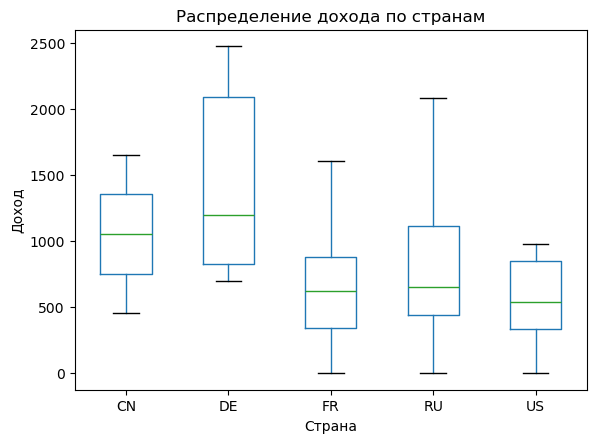

In [219]:
df.boxplot(column='revenue', by='country')
plt.title('Распределение дохода по странам')
plt.suptitle('')
plt.xlabel('Страна')
plt.ylabel('Доход')
plt.grid(False)
plt.savefig('figures/country_revenue.png', dpi=300, bbox_inches='tight')

Второй график показывает распределение дохода по странам. Например, в Германии (DE) наблюдается правосторонняя симметрия (медиана расположена ближе к наименьшим значениям), в России тоже наблюдается правосторонняя симметрия. Доход остальных стран распределен равномерно. На графике нет выбросов, значит данные однородны.

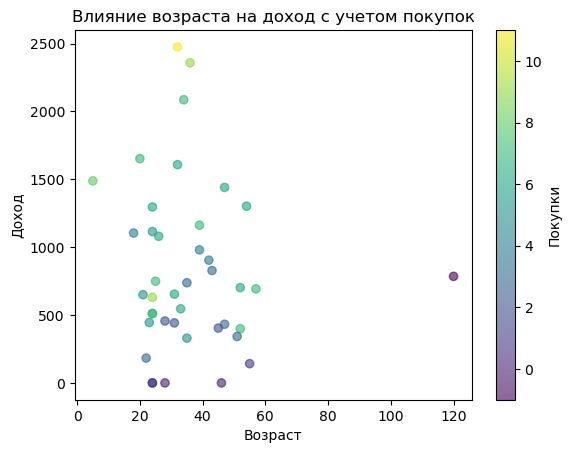

In [217]:
plt.scatter(df['age'], df['revenue'], alpha=0.6, c=df['purchases'], cmap='viridis')
plt.xlabel('Возраст')
plt.ylabel('Доход')
plt.colorbar(label='Покупки')
plt.title('Влияние возраста на доход с учетом покупок')
plt.savefig('figures/age_and_revenue.png', dpi=300, bbox_inches='tight')